In [1]:
import json
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
with open('../data/em1/all.json') as data_file:    
    em1 = json.load(data_file)
with open('../data/sl1/all.json') as data_file:    
    sl1 = json.load(data_file)
with open('../data/si1/all.json') as data_file:    
    si1 = json.load(data_file)
with open('../data/st1/all.json') as data_file:    
    st1 = json.load(data_file)
    
with open('../data/em2/all.json') as data_file:    
    em2 = json.load(data_file)
with open('../data/sl2/all.json') as data_file:    
    sl2 = json.load(data_file)
with open('../data/si2/all.json') as data_file:    
    si2 = json.load(data_file)
with open('../data/st2/all.json') as data_file:    
    st2 = json.load(data_file)
    
with open('../data/em3/all.json') as data_file:    
    em3 = json.load(data_file)
with open('../data/sl3/all.json') as data_file:    
    sl3 = json.load(data_file)
with open('../data/si3/all.json') as data_file:    
    si3 = json.load(data_file)
with open('../data/st3/all.json') as data_file:    
    st3 = json.load(data_file)

In [3]:
data = np.concatenate((em1, sl1, si1, st1, em2, sl2, si2, st2, em3, sl3, si3, st3), axis=0)

In [4]:
np.set_printoptions(threshold=np.nan)
np.set_printoptions(precision=2,suppress=True)
print (data)

[[ -12.88   -4.22   -6.07  -10.76  -17.64  -17.87  -14.36   -9.67   -4.98
    -2.86   -4.32   -2.31    0.  ]
 [ -15.     -4.02   -4.11   -7.97  -14.29  -15.36  -11.57   -8.27   -4.42
    -2.86   -4.32   -2.31    0.  ]
 [ -15.     -5.92  -10.37  -18.3   -29.47  -26.75  -23.79  -14.25   -6.32
    -1.23   -4.68   -0.67    0.  ]
 [ -12.88   -4.22   -5.79   -9.92  -15.12  -16.72  -12.92   -7.96   -3.84
    -0.33   -2.01   -0.33    0.  ]
 [ -12.88   -4.22   -5.8   -10.22  -16.55  -16.51  -13.54   -9.13   -4.71
    -1.23   -4.68   -0.67    0.  ]
 [  -7.03   -2.23   -5.56   -9.46  -13.36  -11.11  -12.54   -8.36   -4.46
    -1.86   -6.8    -1.02    0.  ]
 [ -15.67   -4.91   -6.35  -11.32  -18.2   -18.15  -14.92   -9.95   -4.98
    -0.56    0.      0.      0.  ]
 [ -15.     -4.58   -5.26   -9.96  -16.56  -16.79  -14.38   -9.68   -4.98
    -3.53   -9.     -2.97    0.  ]
 [   0.     -0.56   -3.6    -5.26   -6.37   -5.52   -4.99   -2.5    -0.83
    -2.99   -8.45   -2.99    0.  ]
 [ -18.25   -7.5   

In [5]:
X = data[:, :-1]

In [6]:
y = data[:, -1]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Random Forest Classifier 

In [8]:
rfc = RandomForestClassifier()
parameters = {'n_estimators':[80, 90, 100, 110, 120], 'max_features': (None, 'auto', 'log2'), 'random_state': [42], 'n_jobs': [-1], 'min_samples_leaf': [1, 2, 3, 4]}
clf = GridSearchCV(rfc, parameters)
clf.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [80, 90, 100, 110, 120], 'max_features': (None, 'auto', 'log2'), 'random_state': [42], 'n_jobs': [-1], 'min_samples_leaf': [1, 2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

# Model Evaluation Metrics

In [9]:
y_predrfc = clf.best_estimator_.predict(X_test)

In [10]:
print("RFC :", accuracy_score(y_test, y_predrfc))

('RFC :', 0.82222222222222219)


Normalized confusion matrix
[[ 0.977  0.     0.     0.023]
 [ 0.024  0.829  0.073  0.073]
 [ 0.     0.043  0.681  0.277]
 [ 0.061  0.02   0.102  0.816]]


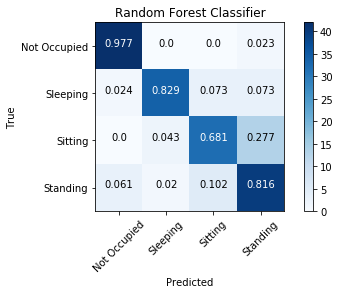

In [17]:
import itertools
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, round(cm[i, j], 3),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True')
    plt.xlabel('Predicted')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_predrfc)
np.set_printoptions(precision=3)

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=np.array(['Not Occupied', 'Sleeping', 'Sitting','Standing'], 
      dtype='|S12'), normalize=True, title='Random Forest Classifier')

plt.show()

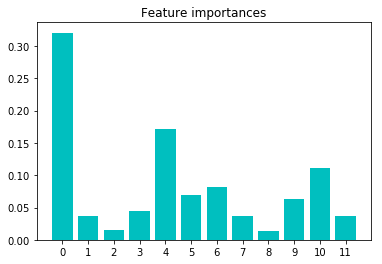

In [19]:
fimportance = clf.best_estimator_.feature_importances_ 

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), fimportance,
       color="c", align="center")
plt.xticks(range(X.shape[1]))
plt.xlim([-1, X.shape[1]])
plt.show()

In [12]:
clf.best_params_

{'max_features': None,
 'min_samples_leaf': 1,
 'n_estimators': 80,
 'n_jobs': -1,
 'random_state': 42}

In [14]:
from sklearn.metrics import log_loss
log_loss(y_test, clf.best_estimator_.predict_proba(X_test))

0.77575079461867491

# Transpile Model

In [63]:
from sklearn_porter import Porter

In [64]:
porter = Porter(clf.best_estimator_, language='js')
output = porter.export()
print(output)

var Brain = function(atts) {

    var predict_000 = function(atts) {
        var classes = new Array(4);
        
        if (atts[7] <= -58.114341735839844) {
            if (atts[11] <= -196.67904663085937) {
                if (atts[4] <= -252.12141418457031) {
                    if (atts[9] <= -470.66082763671875) {
                        classes[0] = 0; 
                        classes[1] = 0; 
                        classes[2] = 2; 
                        classes[3] = 0; 
                    } else {
                        if (atts[2] <= -187.76922607421875) {
                            classes[0] = 0; 
                            classes[1] = 0; 
                            classes[2] = 1; 
                            classes[3] = 0; 
                        } else {
                            classes[0] = 0; 
                            classes[1] = 0; 
                            classes[2] = 0; 
                            classes[3] = 1; 
                        }
   

Normalized confusion matrix
[[ 1.     0.     0.     0.   ]
 [ 0.     1.     0.     0.   ]
 [ 0.     0.     0.727  0.273]
 [ 0.     0.077  0.231  0.692]]


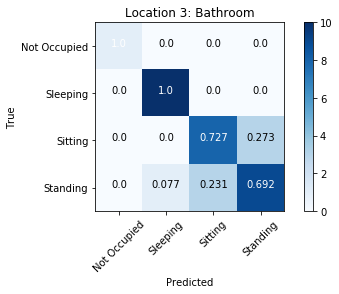

In [30]:
import itertools
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, round(cm[i, j], 3),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True')
    plt.xlabel('Predicted')

y_test_actual1 = [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
y_pred1 = [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3]
    
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test_actual1, y_pred1)
np.set_printoptions(precision=3)

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=np.array(['Not Occupied', 'Sleeping', 'Sitting','Standing'], 
      dtype='|S12'), normalize=True, title='Location 3: Bathroom')

plt.show()

Normalized confusion matrix
[[ 0.     0.     0.     1.   ]
 [ 0.     0.556  0.222  0.222]
 [ 0.     0.     0.083  0.917]
 [ 0.     0.     0.3    0.7  ]]


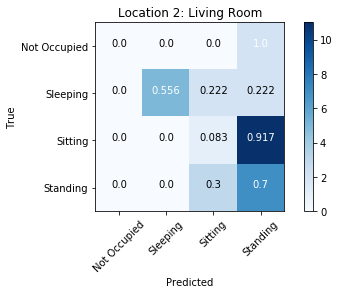

In [31]:
import itertools
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, round(cm[i, j], 3),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True')
    plt.xlabel('Predicted')

y_test_actual1 = [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
y_pred1 = [3, 3, 2, 2, 3, 3, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3]
    
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test_actual1, y_pred1)
np.set_printoptions(precision=3)

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=np.array(['Not Occupied', 'Sleeping', 'Sitting','Standing'], 
      dtype='|S12'), normalize=True, title='Location 2: Living Room')

plt.show()

Normalized confusion matrix
[[ 1.   0.   0.   0. ]
 [ 0.   1.   0.   0. ]
 [ 0.   0.   1.   0. ]
 [ 0.   0.   0.3  0.7]]


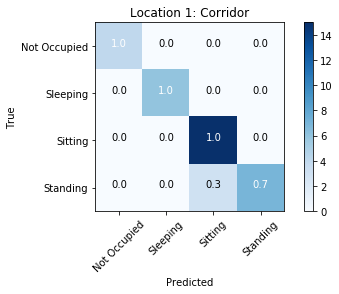

In [33]:
import itertools
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, round(cm[i, j], 3),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True')
    plt.xlabel('Predicted')

y_test_actual1 = [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
y_pred1 = [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3]
    
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test_actual1, y_pred1)
np.set_printoptions(precision=3)

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=np.array(['Not Occupied', 'Sleeping', 'Sitting','Standing'], 
      dtype='|S12'), normalize=True, title='Location 1: Corridor')

plt.show()